In [2]:
%load_ext autoreload
%autoreload 2
import torch
import numpy as np
import wandb
import Neural_Lib_Flo as nlb
import training_lib as tl
import torch.nn.functional as F
import data_analysis as da
import matplotlib.pyplot as plt
import scipy.io
# Set the device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
data_path = '/project/subiculum/new_data/natural_images_awake_postSub.mat'
images_path = '/project/subiculum/new_data/new_images.npy'

In [3]:
ids=scipy.io.loadmat('/project/subiculum/new_data/IDs.mat')
ids=ids['rec']
ids=ids[:,0]
responses, stim_list, binsize, idx_cellType, labels = nlb.load_mat_file(data_path)
idx_cellType=np.ndarray.flatten(idx_cellType)
idx_cellType[idx_cellType==0]=4
images=np.load(images_path)
stim_list=["0.png",
"1.png",
"2.png",
"3.png",
"4.png",
"6.png",
"7.png",
"12.png",
"14.png",
"19.png",
"19.png",
"19.png",
"19.png",
"19.png",
"23.png",
"23.png",
"23.png",
"23.png",
"23.png",
"27.png",
"31.png",
"34.png",
"38.png",
"39.png",
"41.png",
"48.png",
"49.png",
"53.png",
"54.png",
"55.png",
"56.png",
"59.png",
"60.png",
"64.png",
"66.png",
"72.png",
"73.png",
"75.png",
"81.png",
"82.png",
"84.png",
"85.png",
"88.png",
"89.png",
"90.png",
"91.png",
"92.png",
"93.png",
"94.png",
"96.png",
"97.png",
"100.png",
"104.png",
"112.png",
"112.png",
"112.png",
"112.png",
"112.png",
"113.png",
"113.png",
"113.png",
"113.png",
"113.png",
"116.png",
"118.png",
"121.png",
"126.png",
"126.png",
"126.png",
"126.png",
"126.png",
"130.png",
"130.png",
"130.png",
"130.png",
"130.png",
"133.png",
"134.png",
"135.png",
"137.png",
"152.png",
"154.png",
"156.png",
"158.png",
"159.png",
"162.png",
"164.png",
"170.png",
"173.png",
"174.png",
"175.png",
"176.png",
"191.png",
"193.png",
"195.png",
"196.png",
"200.png",
"202.png",
"204.png",
"205.png",
"209.png",
"211.png",
"214.png",
"216.png",
"217.png",
"218.png",
"219.png",
"221.png",
"222.png",
"223.png",
"224.png",
"226.png",
"228.png",
"229.png",
"230.png",
"232.png",
"234.png",
"235.png",
"236.png",
"243.png",
"245.png",
"247.png",
"248.png",
"250.png",
"252.png",
"254.png",
"255.png",
"265.png",
"265.png",
"265.png",
"265.png",
"265.png",
"268.png",
"269.png",
"271.png",
"275.png",
"276.png",
"277.png",
"280.png",
"282.png",
"283.png",
"285.png",
"288.png",
"293.png",
"296.png",
"297.png",
"299.png",
"300.png",
"302.png",
"304.png",
"307.png",
"308.png",
"312.png",
"313.png",
"314.png",
"316.png",
"318.png",
"320.png",
"322.png",
"323.png",
"324.png",
"325.png",
"326.png",
"332.png",
"337.png",
"339.png",
"340.png",
"346.png",
"346.png",
"346.png",
"346.png",
"346.png",
"347.png",
"347.png",
"347.png",
"347.png",
"347.png",
"351.png",
"351.png",
"351.png",
"351.png",
"351.png",
"353.png",
"353.png",
"353.png",
"353.png",
"353.png",
"354.png",
"357.png",
"364.png",
"368.png",
"370.png",
"372.png",
"374.png",
"379.png",
"383.png",
"383.png",
"383.png",
"383.png",
"383.png",
"390.png",
"390.png",
"390.png",
"390.png",
"390.png",
"391.png",
"392.png",
"395.png",
"397.png",
"398.png",
"401.png",
"404.png",
"410.png",
"411.png",
"412.png",
"414.png",
"415.png",
"417.png",
"418.png",
"419.png",
"420.png",
"424.png",
"425.png",
"428.png",
"429.png",
"431.png",
"433.png",
"434.png",
"437.png",
"438.png",
"439.png",
"440.png",
"441.png",
"442.png",
"443.png",
"444.png",
"445.png",
"446.png",
"446.png",
"446.png",
"446.png",
"446.png",
"447.png",
"447.png",
"447.png",
"447.png",
"447.png",
"451.png",
"451.png",
"451.png",
"451.png",
"451.png",
"458.png",
"459.png",
"460.png",
"461.png",
"462.png",
"464.png",
"466.png",
"469.png",
"470.png",
"472.png",
"473.png",
"475.png",
"476.png",
"477.png",
"478.png",
"479.png",
"480.png",
"481.png",
"483.png",
"487.png",
"488.png",
"489.png",
"490.png",
"492.png",
"493.png",
"494.png",
"495.png",
"496.png",
"498.png",
"499.png",
"500.png",
"510.png",
"511.png",
"512.png",
"524.png",
"526.png",
"531.png",
"532.png",
"533.png",
"534.png",
"535.png",
"536.png",
"537.png",
"542.png",
"545.png",
"552.png",
"552.png",
"552.png",
"552.png",
"552.png",
"556.png",
"557.png",
"558.png",
"559.png",
"560.png",
"561.png",
"563.png",
"564.png",
"568.png",
"568.png",
"568.png",
"568.png",
"568.png",
"572.png",
"572.png",
"572.png",
"572.png",
"572.png",
"574.png",
"577.png",
"578.png",
"579.png",
"581.png",
"585.png",
"587.png",
"590.png",
"593.png",
"598.png",
"599.png",
"602.png",
"603.png",
"604.png",
"605.png",
"606.png",
"610.png",
"611.png",
"613.png",
"618.png",
"620.png",
"623.png",
"630.png",
"632.png",
"633.png",
"636.png",
"637.png",
"640.png",
"641.png",
"644.png",
"650.png",
"651.png",
"653.png",
"654.png",
"655.png",
"656.png",
"658.png",
"659.png",
"660.png",
"661.png",
"662.png",
"663.png",
"664.png",
"669.png",
"672.png",
"674.png",
"676.png",
"677.png",
"679.png",
"681.png",
"682.png",
"685.png",
"691.png",
"692.png",
"694.png",
"695.png",
"696.png",
"697.png",
"698.png",
"700.png",
"705.png",
"705.png",
"705.png",
"705.png",
"705.png",
"713.png",
"715.png",
"718.png",
"720.png",
"721.png",
"722.png",
"723.png",
"724.png",
"726.png",
"729.png",
"730.png",
"734.png",
"735.png",
"737.png",
"752.png",
"756.png",
"758.png",
"759.png",
"762.png",
"763.png",
"765.png",
"770.png",
"773.png",
"774.png",
"775.png",
"776.png",
"777.png",
"779.png",
"786.png",
"789.png",
"790.png",
"793.png",
"794.png",
"796.png",
"798.png",
"802.png",
"803.png",
"804.png",
"805.png",
"807.png",
"811.png",
"813.png",
"814.png",
"817.png",
"818.png",
"819.png",
"820.png",
"823.png",
"823.png",
"823.png",
"823.png",
"823.png",
"827.png",
"827.png",
"827.png",
"827.png",
"827.png",
"831.png",
"831.png",
"831.png",
"831.png",
"831.png",
"833.png",
"834.png",
"836.png",
"838.png",
"839.png",
"840.png",
"841.png",
"843.png",
"844.png",
"845.png",
"846.png",
"848.png",
"850.png",
"852.png",
"853.png",
"855.png",
"859.png",
"873.png",
"873.png",
"873.png",
"873.png",
"873.png",
"877.png",
"888.png",
"889.png",
"891.png",
"892.png",
"894.png",
"897.png",
"898.png",
"900.png",
"901.png",
"902.png",
"903.png",
"906.png",
"909.png",
"910.png",
"912.png",
"913.png",
"914.png",
"917.png",
"919.png",
"920.png",
"921.png",
"923.png",
"924.png",
"928.png",
"932.png",
"933.png",
"936.png",
"937.png",
"939.png",
"941.png",
"945.png",
"947.png",
"948.png",
"950.png",
"952.png",
"954.png",
"955.png",
"956.png",
"957.png",
"958.png",
"959.png",
"960.png",
"963.png",
"965.png",
"966.png",
"967.png",
"968.png",
"970.png",
"971.png",
"974.png",
"975.png",
"976.png",
"991.png",
"992.png",
"1008.png",
"1008.png",
"1008.png",
"1008.png",
"1008.png",
"1012.png",
"1012.png",
"1012.png",
"1012.png",
"1012.png",
"1016.png",
"1018.png",
"1019.png",
"1020.png",
"1022.png",
"1024.png",
"1026.png",
"1028.png",
"1029.png",
"1030.png",
"1034.png",
"1037.png",
"1039.png",
"1044.png",
"1045.png",
"1047.png",
"1048.png",
"1050.png",
"1051.png",
"1052.png",
"1054.png",
"1056.png",
"1057.png",
"1059.png",
"1060.png",
"1062.png",
"1063.png",
"1064.png",
"1066.png",
"1070.png",
"1074.png",
"1075.png",
"1089.png",
"1091.png",
"1092.png",
"1093.png",
"1096.png",
"1098.png",
"1101.png",
"1103.png",
"1104.png",
"1108.png",
"1109.png",
"1110.png",
"1111.png",
"1117.png",
"1118.png",
"1120.png",
"1125.png",
"1126.png",
"1127.png",
"1128.png",
"1130.png",
"1131.png",
"1132.png",
"1133.png",
"1135.png",
"1136.png",
"1137.png",
"1147.png",
"1147.png",
"1147.png",
"1147.png",
"1147.png",
"1148.png",
"1149.png",
"1149.png",
"1149.png",
"1149.png",
"1149.png",
"1159.png",
"1160.png",
"1163.png",
"1164.png",
"1167.png",
"1170.png",
"1171.png",
"1172.png",
"1174.png",
"1177.png",
"1178.png",
"1181.png",
"1183.png",
"1185.png",
"1187.png",
"1188.png",
"1190.png",
"1191.png",
"1193.png",
"1194.png",
"1196.png",
"1197.png",
"1198.png",
"1201.png",
"1202.png",
"1203.png",
"1204.png",
"1207.png",
"1208.png",
"1210.png",
"1211.png",
"1212.png",
"1216.png",
"1217.png",
"1219.png",
"1222.png",
"1224.png",
"1225.png",
"1226.png",
"1231.png",
"1233.png",
"1235.png",
"1236.png",
"1237.png",
"1238.png",
"1242.png",
"1242.png",
"1242.png",
"1242.png",
"1242.png",
"1251.png",
"1252.png",
"1257.png",
"1258.png",
"1261.png",
"1263.png",
"1265.png",
"1277.png",
"1278.png",
"1279.png",
"1280.png",
"1281.png",
"1283.png",
"1285.png",
"1287.png",
"1288.png",
"1289.png",
"1294.png",
"1295.png",
"1296.png",
"1297.png",
"1299.png",
"1301.png",
"1302.png",
"1303.png",
"1304.png",
"1305.png",
"1306.png",
"1307.png",
"1309.png",
"1311.png",
"1314.png",
"1316.png",
"1320.png",
"1321.png",
"1322.png",
"1324.png",
"1325.png",
"1326.png",
"1329.png",
"1330.png",
"1331.png",
"1333.png",
"1335.png",
"1336.png",
"1337.png",
"1338.png",
"1340.png",
"1342.png",
"1343.png",
"1344.png",
"1347.png",
"1349.png",
"1350.png",
"1352.png",
"1364.png",
"1364.png",
"1364.png",
"1364.png",
"1364.png",
"1368.png",
"1371.png",
"1372.png",
"1373.png",
"1377.png",
"1378.png",
"1380.png",
"1381.png",
"1383.png",
"1384.png",
"1385.png",
"1387.png",
"1388.png",
"1390.png",
"1393.png",
"1397.png",
"1398.png",
"1400.png",
"1404.png",
"1405.png",
"1407.png",
"1413.png",
"1414.png",
"1415.png",
"1416.png",
"1432.png",
"1433.png",
"1434.png",
"1435.png",
"1439.png",
"1440.png",
"1446.png",
"1446.png",
"1446.png",
"1446.png",
"1446.png",
"1452.png",
"1452.png",
"1452.png",
"1452.png",
"1452.png",
"1457.png",
"1459.png",
"1461.png",
"1466.png",
"1467.png",
"1468.png",
"1469.png",
"1470.png",
"1471.png",
"1473.png",
"1474.png",
"1476.png",
"1477.png",
"1478.png",
"1479.png",
"1481.png",
"1482.png",
"1483.png",
"1484.png",
"1487.png",
"1487.png",
"1487.png",
"1487.png",
"1487.png",
"1495.png",
"1496.png",
"1497.png",
"1498.png",
"1502.png",
"1506.png",
"1509.png",
"1510.png",
"1512.png",
"1514.png",
"1517.png",
"1519.png",
"1520.png",
"1522.png",
"1524.png",
"1527.png",
"1531.png",
"1532.png",
"1533.png",
"1537.png",
"1541.png",
"1543.png",
"1544.png",
"1546.png",
"1547.png",
"1549.png",
"1550.png",
"1551.png",
"1554.png",
"1561.png",
"1562.png",
"1566.png",
"1566.png",
"1566.png",
"1566.png",
"1566.png",
"1572.png",
"1572.png",
"1572.png",
"1572.png",
"1572.png",
"1576.png",
"1577.png",
"1578.png",
"1579.png",
"1581.png",
"1582.png",
"1583.png",
"1585.png",
"1586.png",
"1587.png",
"1590.png",
"1592.png",
"1593.png",
"1594.png",
"1601.png",
"1602.png",
"1603.png",
"1604.png",
"1606.png",
"1609.png",
"1613.png",
"1615.png",
"1617.png",
"1620.png",
"1622.png",
"1623.png",
"1624.png",
"1625.png",
"1627.png",
"1628.png",
"1630.png",
"1632.png",
"1633.png",
"1634.png",
"1635.png",
"1639.png",
"1641.png",
"1642.png",
"1643.png",
"1644.png",
"1647.png",
"1651.png",
"1652.png",
"1655.png",
"1656.png",
"1658.png",
"1659.png",
"1661.png",
"1663.png",
"1665.png",
"1667.png",
"1668.png",
"1669.png",
"1673.png",
"1679.png",
"1680.png",
"1691.png",
"1695.png",
"1698.png",
"1699.png",
"1701.png",
"1702.png",
"1703.png",
"1705.png",
"1706.png",
"1708.png",
"1709.png",
"1714.png",
"1715.png",
"1716.png",
"1719.png",
"1722.png",
"1723.png",
"1724.png",
"1725.png",
"1726.png",
"1727.png",
"1728.png",
"1733.png",
"1744.png",
"1745.png",
"1746.png",
"1747.png",
"1751.png",
"1753.png",
"1767.png",
"1768.png",
"1772.png",
"1773.png",
"1775.png",
"1777.png",
"1779.png",
"1786.png",
"1788.png",
"1789.png",
"1791.png",
"1792.png",
"1795.png",
"1796.png",
"1798.png",
"1800.png",
"1801.png",
"1802.png",
"1803.png",
"1804.png",
"1805.png",
"1809.png",
"1811.png",
"1815.png",
"1817.png",
"1818.png",
"1819.png",
"1820.png",
"1824.png",
"1829.png",
"1831.png",
"1834.png",
"1834.png",
"1834.png",
"1834.png",
"1834.png",
"1841.png",
"1841.png",
"1841.png",
"1841.png",
"1841.png",
"1843.png",
"1844.png",
"1849.png",
"1850.png",
"1851.png",
"1852.png",
"1853.png",
"1854.png",
"1855.png",
"1856.png",
"1857.png",
"1860.png",
"1861.png",
"1863.png",
"1866.png",
"1868.png",
"1871.png",
"1873.png",
"1874.png",
"1878.png",
"1879.png",
"1880.png",
"1884.png",
"1886.png",
"1887.png",
"1888.png",
"1889.png",
"1890.png",
"1893.png",
"1895.png",
"1896.png",
"1897.png",
"1900.png",
"1901.png",
"1902.png",
"1904.png",
"1907.png",
"1909.png",
"1910.png",
"1913.png",
"1915.png",
"1916.png",
"1918.png",
"1923.png",
"1923.png",
"1923.png",
"1923.png",
"1923.png",
"1931.png",
"1932.png",
"1933.png",
"1934.png",
"1936.png",
"1937.png",
"1938.png",
"1939.png",
"1940.png",
"1942.png",
"1953.png",
"1954.png",
"1956.png",
"1957.png",
"1958.png",
"1959.png",
"1960.png",
"1962.png",
"1964.png",
"1969.png",
"1970.png",
"1986.png",
"1992.png",
"1993.png",
"1994.png",
"1995.png",
"1997.png",
"1999.png",
"2002.png",
"2003.png",
"2005.png",
"2006.png",
"2010.png",
"2012.png",
"2013.png",
"2015.png",
"2018.png",
"2020.png",
"2021.png",
"2022.png",
"2023.png",
"2024.png",
"2026.png",
"2028.png",
"2029.png",
"2029.png",
"2029.png",
"2029.png",
"2029.png",
"2033.png",
"2033.png",
"2033.png",
"2033.png",
"2033.png",
"2040.png",
"2041.png",
"2044.png",
"2048.png",
"2049.png",
"2050.png",
"2051.png",
"2052.png",
"2055.png",
"2058.png",
"2059.png",
"2061.png",
"2066.png",
"2067.png",
"2069.png",
"2070.png",
"2073.png",
"2078.png",
"2079.png",
"2080.png",
"2082.png",
"2083.png",
"2084.png",
"2085.png",
"2088.png",
"2089.png",
"2091.png",
"2095.png",
"2096.png",
"2097.png",
"2097.png",
"2097.png",
"2097.png",
"2097.png",
"2107.png",
"2108.png",
"2109.png",
"2110.png",
"2111.png",
"2115.png",
"2118.png",
"2120.png",
"2121.png",
"2123.png",
"2126.png",
"2127.png",
"2128.png",
"2132.png",
"2134.png",
"2135.png",
"2137.png",
"2138.png",
"2139.png",
"2143.png",
"2145.png",
"2147.png",
"2148.png",
"2151.png",
"2152.png",
"2153.png",
"2156.png",
"2160.png",
"2162.png",
"2163.png",
"2165.png",
"2167.png",
"2168.png",
"2169.png",
"2170.png",
"2172.png",
"2178.png",
"2179.png",
"2180.png",
"2182.png",
"2185.png",
"2186.png",
"2188.png",
"2189.png",
"2193.png",
"2194.png",
"2195.png",
"2196.png",
"2198.png",
"2199.png",
"2200.png",
"2201.png",
"2204.png",
"2206.png",
"2207.png",
"2210.png",
"2212.png",
"2222.png",
"2222.png",
"2222.png",
"2222.png",
"2222.png",
"2223.png",
"2224.png",
"2225.png",
"2226.png",
"2227.png",
"2228.png",
"2229.png",
"2230.png",
"2231.png",
"2231.png",
"2231.png",
"2231.png",
"2231.png",
"2236.png",
"2236.png",
"2236.png",
"2236.png",
"2236.png",
"2241.png",
"2246.png",
"2247.png",
"2248.png",
"2250.png",
"2255.png",
"2258.png",
"2260.png",
"2260.png",
"2260.png",
"2260.png",
"2260.png",
"2269.png",
"2271.png",
"2272.png",
"2274.png",
"2277.png",
"2278.png",
"2282.png",
"2283.png",
"2285.png",
"2286.png",
"2287.png",
"2288.png",
"2289.png",
"2290.png",
"2293.png",
"2295.png",
"2298.png",
"2299.png",
"2300.png",
"2301.png",
"2302.png",
"2305.png",
"2306.png",
"2312.png",
"2314.png",
"2316.png",
"2317.png",
"2318.png",
"2325.png",
"2326.png",
"2328.png",
"2330.png",
"2331.png",
"2332.png",
"2335.png",
"2336.png",
"2337.png",
"2340.png",
"2341.png",
"2342.png",
"2344.png",
"2346.png",
"2347.png",
"2349.png",
"2350.png",
"2351.png",
"2352.png",
"2353.png",
"2359.png",
"2363.png",
"2363.png",
"2363.png",
"2363.png",
"2363.png",
"2374.png",
"2377.png",
"2379.png",
"2380.png",
"2383.png",
"2384.png",
"2385.png",
"2386.png",
"2390.png",
"2394.png",
"2398.png",
"2402.png",
"2403.png",
"2406.png",
"2407.png",
"2408.png",
"2410.png",
"2411.png",
"2412.png",
"2414.png",
"2415.png",
"2418.png",
"2420.png",
"2424.png",
"2425.png",
"2426.png",
"2429.png",
"2431.png",
"2433.png",
"2434.png",
"2435.png",
"2436.png",
"2441.png",
"2442.png",
"2443.png",
"2444.png",
"2445.png",
"2446.png",
"2447.png",
"2448.png",
"2449.png",
"2450.png",
"2451.png",
"2452.png",
"2453.png",
"2460.png",
"2460.png",
"2460.png",
"2460.png",
"2460.png",
"2468.png",
"2469.png",
"2480.png",
"2480.png",
"2480.png",
"2480.png",
"2480.png",
"2481.png",
"2483.png",
"2486.png",
"2488.png",
"2490.png",
"2492.png",
"2493.png",
"2495.png",
"2496.png",
"2497.png",
"2498.png",
"2500.png",
"2501.png",
"2506.png",
"2509.png",
"2512.png",
"2513.png",
"2515.png",
"2518.png",
"2519.png",
"2521.png",
"2522.png",
"2525.png",
"2527.png",
"2528.png",
"2533.png",
"2536.png",
"2538.png",
"2539.png",
"2540.png",
"2541.png",
"2552.png",
"2554.png",
"2555.png",
"2556.png",
"2557.png",
"2559.png",
"2562.png",
"2575.png",
"2576.png",
"2579.png",
"2584.png",
"2585.png",
"2588.png",
"2591.png",
"2598.png",
"2599.png",
"2603.png",
"2604.png",
"2605.png",
"2606.png",
"2608.png",
"2610.png",
"2617.png",
"2617.png",
"2617.png",
"2617.png",
"2617.png",
"2625.png",
"2628.png",
"2635.png",
"2638.png",
"2639.png",
"2641.png",
"2642.png",
"2644.png",
"2645.png",
"2648.png",
"2649.png",
"2651.png",
"2652.png",
"2654.png",
"2655.png",
"2657.png",
"2659.png",
"2661.png",
"2665.png",
"2666.png",
"2668.png",
"2669.png",
"2672.png",
"2673.png",
"2675.png",
"2676.png",
"2677.png",
"2678.png",
"2682.png",
"2685.png",
"2689.png",
"2693.png",
"2694.png",
"2696.png",
"2699.png",
"2701.png",
"2703.png",
"2704.png",
"2706.png",
"2709.png",
"2712.png",
"2714.png",
"2717.png",
"2718.png",
"2719.png",
"2723.png",
"2724.png",
"2725.png",
"2726.png",
"2731.png",
"2732.png",
"2733.png",
"2734.png",
"2736.png",
"2740.png",
"2741.png",
"2744.png",
"2745.png",
"2746.png",
"2749.png",
"2750.png",
"2751.png",
"2752.png",
"2754.png",
"2755.png",
"2761.png",
"2763.png",
"2764.png",
"2765.png",
"2768.png",
"2769.png",
"2770.png",
"2774.png",
"2776.png",
"2778.png",
"2780.png",
"2781.png",
"2782.png",
"2783.png",
"2787.png",
"2787.png",
"2787.png",
"2787.png",
"2787.png",
"2789.png",
"2789.png",
"2789.png",
"2789.png",
"2789.png",
"2790.png",
"2790.png",
"2790.png",
"2790.png",
"2790.png",
"2796.png",
"2798.png",
"2809.png",
"2811.png",
"2812.png",
"2813.png",
"2814.png",
"2815.png",
"2816.png",
"2826.png",
"2826.png",
"2826.png",
"2826.png",
"2826.png",
"2827.png",
"2828.png",
"2834.png",
"2835.png",
"2842.png",
"2842.png",
"2842.png",
"2842.png",
"2842.png",
"2843.png",
"2843.png",
"2843.png",
"2843.png",
"2843.png",
"2846.png",
"2846.png",
"2846.png",
"2846.png",
"2846.png",
"2850.png",
"2863.png",
"2863.png",
"2863.png",
"2863.png",
"2863.png",
"2869.png",
"2869.png",
"2869.png",
"2869.png",
"2869.png",
"2875.png",
"2876.png",
"2878.png",
"2879.png",
"2880.png",
"2881.png",
"2884.png",
"2885.png",
"2889.png",
"2890.png",
"2891.png",
"2894.png",
"2898.png",
"2899.png",
"2902.png",
"2903.png",
"2904.png",
"2905.png",
"2906.png",
"2908.png",
"2910.png",
"2912.png",
"2914.png",
"2915.png",
"2922.png",
"2923.png",
"2924.png",
"2928.png",
"2930.png",
"2935.png",
"2937.png",
"2938.png",
"2940.png",
"2941.png",
"2942.png",
"2943.png",
"2953.png",
"2953.png",
"2953.png",
"2953.png",
"2953.png",
"2960.png",
"2961.png",
"2962.png",
"2964.png",
"2970.png",
"2971.png",
"2972.png",
"2973.png",
"2975.png",
"2976.png",
"2978.png",
"2984.png",
"2986.png",
"2987.png",
"2988.png",
"2989.png",
"2990.png",
"2995.png",
"3003.png",
"3005.png",
"3008.png",
"3011.png",
"3012.png",
"3013.png",
"3014.png",
"3015.png",
"3020.png",
"3022.png",
"3024.png",
"3027.png",
"3028.png",
"3029.png",
"3030.png",
"3032.png",
"3041.png",
"3041.png",
"3041.png",
"3041.png",
"3041.png",
"3044.png",
"3047.png",
"3048.png",
"3049.png",
"3050.png",
"3052.png",
"3054.png",
"3055.png",
"3057.png",
"3060.png",
"3063.png",
"3065.png",
"3069.png",
"3070.png",
"3071.png",
"3073.png",
"3076.png",
"3077.png",
"3078.png",
"3080.png",
"3083.png",
"3084.png",
"3086.png",
"3087.png",
"3088.png",
"3090.png",
"3093.png",
"3106.png",
"3108.png",
"3109.png",
"3112.png",
"3114.png",
"3116.png",
"3119.png",
"3121.png",
"3123.png",
"3124.png",
"3125.png",
"3126.png",
"3128.png",
"3129.png",
"3130.png",
"3133.png",
"3134.png",
"3137.png",
"3138.png",
"3145.png",
"3146.png",
"3147.png",
"3148.png",
"3149.png",
"3154.png",
"3155.png",
"3157.png",
"3159.png",
"3160.png",
"3161.png",
"3162.png",
"3163.png",
"3166.png",
"3168.png",
"3175.png",
"3177.png",
"3179.png",
"3185.png",
"3186.png",
"3187.png",
"3189.png",
"3190.png",
"3191.png",
"3196.png",
"3210.png",
"3215.png",
"3226.png",
"3233.png",
"3233.png",
"3233.png",
"3233.png",
"3233.png",
"3240.png",
"3242.png",
"3245.png",
"3246.png",
"3250.png",
"3252.png",
"3254.png",
"3255.png",
"3256.png",
"3257.png",
"3258.png",
"3259.png",
"3260.png",
"3263.png",
"3264.png",
"3266.png",
"3269.png",
"3272.png",
"3273.png",
"3274.png",
"3276.png",
"3280.png",
"3281.png",
"3282.png",
"3283.png",
"3286.png",
"3288.png",
"3289.png",
"3290.png",
"3301.png",
"3302.png",
"3314.png",
"3315.png",
"3327.png",
"3328.png",
"3330.png",
"3334.png",
"3337.png",
"3338.png",
"3340.png",
"3344.png",
"3346.png",
"3358.png",
"3359.png",
"3361.png",
"3362.png",
"3366.png",
"3369.png",
"3370.png",
"3371.png",
"3374.png",
"3375.png",
"3379.png",
"3387.png",
"3388.png",
"3389.png",
"3392.png",
"3395.png",
"3399.png",
"3399.png",
"3399.png",
"3399.png",
"3399.png",
"3406.png",
"3408.png",
"3412.png",
"3415.png",
"3416.png",
"3417.png",
"3419.png",
"3424.png",
"3425.png",
"3426.png",
"3427.png",
"3429.png",
"3431.png",
"3432.png",
"3433.png",
"3435.png",
"3436.png",
"3438.png",
"3439.png",
"3440.png",
"3441.png",
"3442.png",
"3444.png",
"3445.png",
"3447.png",
"3451.png",
"3452.png",
"3453.png",
"3455.png",
"3458.png",
"3459.png",
"3460.png",
"3461.png",
"3463.png",
"3464.png",
"3465.png",
"3466.png",
"3468.png",
"3471.png",
"3472.png",
"3473.png",
"3474.png",
"3476.png",
"3479.png",
"3480.png",
"3482.png",
"3484.png",
"3488.png",
"3490.png",
"3492.png",
"3493.png",
"3494.png",
"3495.png",
"3498.png",
"3502.png",
"3503.png",
"3504.png",
"3505.png",
"3506.png",
"3513.png",
"3517.png",
"3520.png",
"3522.png",
"3523.png",
"3526.png",
"3527.png",
"3528.png",
"3531.png",
"3534.png",
"3535.png",
"3537.png",
"3539.png",
"3540.png",
"3543.png",
"3545.png",
"3546.png",
"3557.png",
"3559.png",
"3564.png",
"3566.png",
"3567.png",
"3571.png",
"3572.png",
"3574.png",
"3578.png",
"3579.png",
"3580.png",
"3591.png",
"3593.png",
"3594.png",
"3595.png",
"3598.png",
"3600.png",
"3601.png",
"3603.png",
"3606.png",
"3610.png",
"3611.png",
"3613.png",
"3614.png",
"3616.png",
"3618.png",
"3619.png",
"3621.png",
"3623.png",
"3624.png",
"3626.png",
"3628.png",
"3629.png",
"3631.png",
"3632.png",
"3638.png",
"3640.png",
"3642.png",
"3643.png",
"3647.png",
"3649.png",
"3650.png",
"3651.png",
"3654.png",
"3656.png",
"3659.png",
"3664.png",
"3665.png",
"3667.png",
"3680.png",
"3684.png",
"3688.png",
"3693.png",
"3696.png",
"3698.png",
"3699.png",
"3701.png",
"3703.png",
"3705.png",
"3707.png",
"3708.png",
"3710.png",
"3710.png",
"3710.png",
"3710.png",
"3710.png",
"3713.png",
"3713.png",
"3713.png",
"3713.png",
"3713.png",
"3721.png",
"3722.png",
"3723.png",
"3724.png",
"3726.png",
"3727.png",
"3728.png",
"3729.png",
"3735.png",
"3737.png",
"3739.png",
"3744.png",
"3745.png",
"3747.png",
"3748.png",
"3749.png",
"3750.png",
"3752.png",
"3756.png",
"3757.png",
"3758.png",
"3760.png",
"3761.png",
"3762.png",
"3770.png",
"3774.png",
"3775.png",
"3776.png",
"3777.png",
"3780.png",
"3781.png",
"3782.png",
"3783.png",
"3785.png",
"3792.png",
"3795.png",
"3797.png",
"3799.png",
"3801.png",
"3803.png",
"3806.png",
"3808.png",
"3811.png",
"3812.png",
"3813.png",
"3814.png",
"3815.png",
"3816.png",
"3820.png",
"3821.png",
"3824.png",
"3825.png",
"3826.png",
"3827.png",
"3828.png",
"3832.png",
"3833.png",
"3835.png",
"3837.png",
"3848.png",
"3852.png",
"3854.png",
"3857.png",
"3858.png",
"3859.png",
"3861.png",
"3864.png",
"3866.png",
"3867.png",
"3868.png",
"3869.png",
"3872.png",
"3872.png",
"3872.png",
"3872.png",
"3872.png",
"3882.png",
"3884.png",
"3885.png",
"3886.png",
"3888.png",
"3890.png",
"3898.png",
"3902.png",
"3904.png",
"3907.png",
"3908.png",
"3910.png",
"3911.png",
"3915.png",
"3915.png",
"3915.png",
"3915.png",
"3915.png",
"3922.png",
"3923.png",
"3924.png",
"3928.png",
"3934.png",
"3935.png",
"3937.png",
"3938.png",
"3939.png",
"3940.png",
"3941.png",
"3944.png",
"3945.png",
"3946.png",
"3948.png",
"3950.png",
"3951.png",
"3953.png",
"3954.png",
"3956.png",
"3958.png",
"3960.png",
"3962.png",
"3963.png",
"3964.png",
"3966.png",
"3970.png",
"3971.png",
"3972.png",
"3973.png",
"3974.png",
"3977.png",
"3984.png",
"3985.png",
"3987.png",
"3988.png",
"3990.png",
"3995.png",
"3996.png",
"3997.png",
"3999.png",
"4002.png",
"4004.png",
"4007.png",
"4008.png",
"4012.png",
"4013.png",
"4015.png",
"4018.png",
"4020.png",
"4021.png",
"4022.png",
"4023.png",
"4024.png",
"4025.png",
"4026.png",
"4032.png",
"4032.png",
"4032.png",
"4032.png",
"4032.png",
"4037.png",
"4038.png",
"4041.png",
"4045.png",
"4046.png",
"4047.png",
"4053.png",
"4057.png",
"4059.png",
"4061.png",
"4065.png",
"4083.png",
"4086.png",
"4087.png",
"4088.png",
"4089.png",
"4090.png",
"4091.png",
"4092.png",
"4093.png",
"4094.png",
"4095.png",
"4097.png",
"4099.png",
"4100.png",
"4106.png",
"4108.png",
"4112.png",
"4113.png",
"4114.png",
"4117.png",
"4118.png",
"4119.png",
"4124.png",
"4124.png",
"4124.png",
"4124.png",
"4124.png",
"4130.png",
"4130.png",
"4130.png",
"4130.png",
"4130.png",
"4132.png",
"4134.png",
"4135.png",
"4136.png",
"4137.png",
"4138.png",
"4142.png",
"4147.png",
"4148.png",
"4149.png",
"4150.png",
"4154.png",
"4160.png",
"4161.png",
"4162.png",
"4164.png",
"4165.png",
"4166.png",
"4170.png",
"4170.png",
"4170.png",
"4170.png",
"4170.png",
"4172.png",
"4172.png",
"4172.png",
"4172.png",
"4172.png",
"4174.png",
"4174.png",
"4174.png",
"4174.png",
"4174.png",
"4179.png",
"4179.png",
"4179.png",
"4179.png",
"4179.png",
"4180.png",
"4181.png",
"4182.png",
"4183.png",
"4186.png",
"4187.png",
"4188.png",
"4189.png",
"4191.png",
"4193.png",
"4194.png",
"4197.png",
"4212.png",
"4213.png",
"4214.png",
"4215.png",
"4216.png",
"4217.png",
"4218.png",
"4219.png",
"4220.png",
"4221.png",
"4224.png",
"4235.png",
"4237.png",
"4239.png",
"4241.png",
"4242.png",
"4243.png",
"4244.png",
"4245.png",
"4248.png",
"4253.png",
"4254.png",
"4255.png",
"4257.png",
"4258.png",
"4259.png",
"4260.png",
"4262.png",
"4264.png",
"4266.png",
"4267.png",
"4272.png",
"4273.png",
"4275.png",
"4276.png",
"4278.png",
"4280.png",
"4283.png",
"4284.png",
"4286.png",
"4290.png",
"4291.png",
"4293.png",
"4296.png",
"4296.png",
"4296.png",
"4296.png",
"4296.png",
"4305.png",
"4306.png",
"4307.png",
"4308.png",
"4309.png",
"4310.png",
"4311.png",
"4312.png",
"4314.png",
"4315.png",
"4316.png",
"4324.png",
"4329.png",
"4330.png",
"4331.png",
"4332.png",
"4332.png",
"4332.png",
"4332.png",
"4332.png",
"4339.png",
"4339.png",
"4339.png",
"4339.png",
"4339.png",
"4341.png",
"4341.png",
"4341.png",
"4341.png",
"4341.png",
"4343.png",
"4347.png",
"4349.png",
"4351.png",
"4352.png",
"4353.png",
"4355.png",
"4356.png",
"4357.png",
"4358.png",
"4361.png",
"4363.png",
"4364.png",
"4365.png",
"4369.png",
"4370.png",
"4371.png",
"4372.png",
"4374.png",
"4376.png",
"4377.png",
"4380.png",
"4381.png",
"4382.png",
"4383.png",
"4384.png",
"4385.png",
"4387.png",
"4388.png",
"4389.png",
"4392.png",
"4394.png",
"4395.png",
"4396.png",
"4397.png",
"4400.png",
"4401.png",
"4405.png",
"4406.png",
"4407.png",
"4408.png",
"4410.png",
"4412.png",
"4415.png",
"4417.png",
"4418.png",
"4419.png",
"4426.png",
"4429.png",
"4430.png",
"4431.png",
"4432.png",
"4434.png",
"4435.png",
"4436.png",
"4437.png",
"4438.png",
"4440.png",
"4443.png",
"4444.png",
"4445.png",
"4449.png",
"4451.png",
"4452.png",
"4453.png",
"4455.png",
"4462.png",
"4462.png",
"4462.png",
"4462.png",
"4462.png",
"4469.png",
"4469.png",
"4469.png",
"4469.png",
"4469.png",
"4471.png",
"4477.png",
"4478.png",
"4483.png",
"4484.png",
"4487.png",
"4489.png",
"4491.png",
"4492.png",
"4495.png",
"4496.png",
"4497.png",
"4498.png",
"4505.png",
"4506.png",
"4509.png",
"4510.png",
"4513.png",
"4515.png",
"4516.png",
"4517.png",
"4518.png",
"4521.png",
"4522.png",
"4523.png",
"4539.png",
"4542.png",
"4543.png",
"4545.png",
"4546.png",
"4547.png",
"4549.png",
"4550.png",
"4551.png",
"4553.png",
"4554.png",
"4555.png",
"4556.png",
"4560.png",
"4563.png",
"4564.png",
"4565.png",
"4567.png",
"4568.png",
"4573.png",
"4575.png",
"4577.png",
"4580.png",
"4581.png",
"4582.png",
"4584.png",
"4597.png",
"4599.png",
"4603.png",
"4605.png",
"4608.png",
"4616.png",
"4616.png",
"4616.png",
"4616.png",
"4616.png",
"4621.png",
"4623.png",
"4625.png",
"4628.png",
"4631.png",
"4632.png",
"4634.png",
"4637.png",
"4638.png",
"4641.png",
"4642.png",
"4643.png",
"4645.png",
"4646.png",
"4648.png",
"4649.png",
"4650.png",
"4651.png",
"4653.png",
"4655.png",
"4657.png",
"4658.png",
"4660.png",
"4661.png",
"4663.png",
"4664.png",
"4669.png",
"4669.png",
"4669.png",
"4669.png",
"4669.png",
"4670.png",
"4670.png",
"4670.png",
"4670.png",
"4670.png",
"4673.png",
"4673.png",
"4673.png",
"4673.png",
"4673.png",
"4676.png",
"4681.png",
"4682.png",
"4683.png",
"4685.png",
"4694.png",
"4694.png",
"4694.png",
"4694.png",
"4694.png",
"4697.png",
"4701.png",
"4702.png",
"4703.png",
"4704.png",
"4706.png",
"4710.png",
"4711.png",
"4712.png",
"4714.png",
"4715.png",
"4716.png",
"4722.png",
"4724.png",
"4738.png",
"4739.png",
"4740.png",
"4741.png",
"4743.png",
"4746.png",
"4753.png",
"4755.png",
"4757.png",
"4758.png",
"4760.png",
"4771.png",
"4772.png",
"4775.png",
"4776.png",
"4779.png",
"4783.png",
"4786.png",
"4788.png",
"4789.png",
"4790.png",
"4791.png",
"4792.png",
"4793.png",
"4796.png",
"4797.png",
"4801.png",
"4803.png",
"4805.png",
"4809.png",
"4812.png",
"4814.png",
"4815.png",
"4816.png",
"4817.png",
"4818.png",
"4820.png",
"4822.png",
"4824.png",
"4825.png",
"4826.png",
"4830.png",
"4831.png",
"4833.png",
"4834.png",
"4835.png",
"4836.png",
"4838.png",
"4839.png",
"4841.png",
"4844.png",
"4845.png",
"4846.png",
"4847.png",
"4849.png",
"4851.png",
"4852.png",
"4853.png",
"4857.png",
"4857.png",
"4857.png",
"4857.png",
"4857.png",
"4864.png",
"4869.png",
"4870.png",
"4871.png",
"4873.png",
"4874.png",
"4876.png",
"4877.png",
"4880.png",
"4880.png",
"4880.png",
"4880.png",
"4880.png",
"4889.png",
"4895.png",
"4900.png",
"4901.png",
"4903.png",
"4909.png",
"4911.png",
"4915.png",
"4917.png",
"4919.png",
"4920.png",
"4923.png",
"4928.png",
"4931.png",
"4932.png",
"4936.png",
"4937.png",
"4938.png",
"4939.png",
"4941.png",
"4942.png",
"4943.png",
"4945.png",
"4957.png",
"4958.png",
"4960.png",
"4961.png",
"4962.png",
"4964.png",
"4965.png",
"4966.png",
"4967.png",
"4968.png",
"4969.png",
"4971.png",
"4975.png",
"4979.png",
"4980.png",
"4981.png",
"4984.png",
"4985.png",
"4990.png",
"4990.png",
"4990.png",
"4990.png",
"4990.png",
"4991.png",
"4991.png",
"4991.png",
"4991.png",
"4991.png",
"4998.png",
"5000.png",
"5001.png",
"5002.png",
"5004.png",
"5007.png",
"5009.png",
"5010.png",
"5011.png",
"5013.png",
"5015.png",
"5016.png",
"5017.png",
"5021.png",
"5024.png",
"5025.png",
"5026.png",
"5030.png",
"5031.png",
"5034.png",
"5035.png",
"5038.png",
"5042.png",
"5047.png",
"5049.png",
"5050.png",
"5051.png",
"5052.png",
"5054.png",
"5057.png",
"5061.png",
"5062.png",
"5064.png",
"5067.png",
"5069.png",
"5070.png",
"5071.png",
"5072.png",
"5074.png",
"5076.png",
"5080.png",
"5081.png",
"5082.png",
"5084.png",
"5087.png",
"5092.png",
"5094.png",
"5095.png",
"5097.png",
"5103.png",
"5103.png",
"5103.png",
"5103.png",
"5103.png",
"5110.png",
"5114.png",
"5119.png",
"5120.png",
"5121.png",
"5122.png",
"5123.png",
"5124.png",
"5126.png",
"5127.png",
"5129.png",
"5130.png",
"5133.png",
"5135.png",
"5139.png",
"5139.png",
"5139.png",
"5139.png",
"5139.png",
"5140.png",
"5140.png",
"5140.png",
"5140.png",
"5140.png",
"5146.png",
"5147.png",
"5148.png",
"5150.png",
"5153.png",
"5155.png",
"5167.png",
"5168.png",
"5169.png",
"5171.png",
"5176.png",
"5180.png",
"5190.png",
"5190.png",
"5190.png",
"5190.png",
"5190.png",
"5193.png",
"5195.png",
"5196.png",
"5199.png",
"5200.png",
"5201.png",
"5203.png",
"5204.png",
"5206.png",
"5207.png",
"5208.png",
"5209.png",
"5212.png",
"5214.png",
"5215.png",
"5216.png",
"5217.png",
"5219.png",
"5219.png",
"5219.png",
"5219.png",
"5219.png",
"5239.png",
"5240.png",
"5243.png",
"5246.png",
"5249.png",
"5251.png",
"5254.png",
"5258.png",
"5261.png",
"5262.png",
"5263.png",
"5265.png",
"5266.png",
"5267.png",
"5269.png",
"5270.png",
"5271.png",
"5273.png",
"5275.png",
"5278.png",
"5279.png",
"5284.png",
"5285.png",
"5286.png",
"5287.png",
"5293.png",
"5295.png",
"5297.png",
"5301.png",
"5304.png",
"5305.png",
"5306.png",
"5307.png",
"5310.png",
"5312.png",
"5313.png",
"5318.png",
"5324.png",
"5325.png",
"5327.png",
"5330.png",
"5333.png",
"5334.png",
"5335.png",
"5336.png",
"5337.png",
"5340.png",
"5342.png",
"5343.png",
"5344.png",
"5347.png",
"5348.png",
"5349.png",
"5351.png",
"5352.png",
"5353.png",
"5354.png",
"5362.png",
"5363.png",
"5367.png",
"5368.png",
"5375.png",
"5376.png",
"5378.png",
"5379.png",
"5381.png",
"5383.png",
"5384.png",
"5393.png",
"5393.png",
"5393.png",
"5393.png",
"5393.png",
"5396.png",
"5398.png",
"5399.png",
"5400.png",
"5403.png",
"5404.png",
"5408.png",
"5412.png",
"5422.png",
"5422.png",
"5422.png",
"5422.png",
"5422.png",
"5423.png",
"5426.png",
"5429.png",
"5431.png",
"5433.png",
"5435.png",
"5437.png",
"5438.png",
"5441.png",
"5442.png",
"5445.png",
"5446.png",
"5447.png",
"5448.png",
"5450.png",
"5451.png",
"5452.png",
"5457.png",
"5460.png",
"5462.png",
"5463.png",
"5469.png",
"5472.png",
"5474.png",
"5477.png",
"5477.png",
"5477.png",
"5477.png",
"5477.png",
"5482.png",
"5482.png",
"5482.png",
"5482.png",
"5482.png",
"5486.png",
"5488.png",
"5489.png",
"5490.png",
"5493.png",
"5500.png",
"5502.png",
"5504.png",
"5505.png",
"5506.png",
"5509.png",
"5510.png",
"5511.png",
"5515.png",
"5516.png",
"5517.png",
"5519.png",
"5520.png",
"5521.png",
"5522.png",
"5523.png",
"5525.png",
"5526.png",
"5527.png",
"5528.png",
"5529.png",
"5531.png",
"5533.png",
"5535.png",
"5537.png",
"5538.png",
"5539.png",
"5540.png",
"5543.png",
"5545.png",
"5546.png",
"5547.png",
"5548.png",
"5549.png",
"5552.png",
"5553.png",
"5555.png",
"5557.png",
"5560.png",
"5561.png",
"5562.png",
"5563.png",
"5564.png",
"5567.png",
"5570.png",
"5572.png",
"5574.png",
"5576.png",
"5577.png",
"5579.png",
"5580.png",
"5581.png",
"5582.png",
"5583.png",
"5592.png",
"5596.png",
"5597.png",
"5599.png",
"5600.png",
"5602.png",
"5604.png",
"5605.png",
"5609.png",
"5610.png",
"5611.png",
"5613.png",
"5615.png",
"5616.png",
"5619.png",
"5620.png",
"5621.png",
"5623.png",
"5624.png",
"5625.png",
"5629.png",
"5630.png",
"5634.png",
"5635.png",
"5636.png",
"5638.png",
"5639.png",
"5640.png",
"5641.png",
"5642.png",
"5646.png",
"5648.png",
"5649.png",
"5650.png",
"5651.png",
"5652.png",
"5654.png",
"5655.png",
"5657.png",
"5658.png",
"5660.png",
"5662.png",
"5664.png",
"5667.png",
"5669.png",
"5670.png",
"5672.png",
"5674.png",
"5685.png",
"5690.png",
"5691.png",
"5692.png",
"5693.png",
"5694.png",
"5697.png",
"5698.png",
"5702.png",
"5703.png",
"5704.png",
"5706.png",
"5707.png",
"5709.png",
"5710.png",
"5711.png",
"5719.png",
"5720.png",
"5723.png",
"5724.png",
"5727.png",
"5730.png",
"5732.png",
"5733.png",
"5736.png",
"5740.png",
"5741.png",
"5743.png",
"5744.png",
"5748.png",
"5748.png",
"5748.png",
"5748.png",
"5748.png",
"5750.png",
"5750.png",
"5750.png",
"5750.png",
"5750.png",
"5754.png",
"5754.png",
"5754.png",
"5754.png",
"5754.png",
"5755.png",
"5759.png",
"5760.png",
"5761.png",
"5763.png",
"5764.png",
"5765.png",
"5768.png",
"5769.png",
"5771.png",
"5772.png",
"5773.png",
"5775.png",
"5776.png",
"5781.png",
"5782.png",
"5787.png",
"5791.png",
"5794.png",
"5795.png",
"5796.png",
"5797.png",
"5798.png",
"5800.png",
"5803.png",
"5805.png",
"5806.png",
"5809.png",
"5810.png",
"5811.png",
"5813.png",
"5814.png",
"5816.png",
"5818.png",
"5826.png",
"5827.png",
"5828.png",
"5833.png",
"5836.png",
"5837.png",
"5840.png",
"5841.png",
"5842.png",
"5843.png",
"5845.png",
"5847.png",
"5848.png",
"5849.png",
"5852.png",
"5853.png",
"5856.png",
"5857.png",
"5858.png",
"5859.png",
"5863.png",
"5864.png",
"5877.png",
"5878.png",
"5879.png",
"5880.png",
"5882.png",
"5885.png",
"5887.png",
"5889.png",
"5890.png",
"5891.png",
"5896.png",
"5904.png",
"5905.png",
"5907.png",
"5908.png",
"5909.png",
"5914.png",
"5920.png",
"5922.png",
"5923.png",
"5924.png",
"5928.png",
"5931.png",
"5932.png",
"5933.png",
"5936.png",
"5937.png",
"5943.png",
"5944.png",
"5945.png",
"5946.png",
"5951.png",
"5955.png",
"5956.png",
"5958.png",
"5960.png",
"5962.png",
"5965.png",
"5968.png",
"5969.png",
"5971.png",
"5973.png",
"5977.png",
"5978.png",
"5979.png",
"5980.png",
"5984.png",
"5985.png",
"5986.png",
"5989.png",
"5990.png"]

In [22]:
responses_processed=nlb.preprocess_responses(responses,50,120)
print(responses_processed.shape)
print(torch.argmax(torch.sum(responses_processed,axis=0))+1)
resp_normalized=nlb.minmax_scale_per_neuron(responses_processed)

torch.Size([3000, 165])
tensor(121)


In [23]:
on_response_bool=np.array([2,0,1,2,1,2,2,2,1,0,
                  2,1,1,1,1,2,2,0,0,0,
                  2,2,2,0,0,0,0,1,0,0,
                  0,1,1,1,0,0,0,0,0,1,
                  1,0,0,2,0,0,0,2,2,0,
                  0,0,0,1,1,0,0,0,0,0,
                  1,0,1,1,1,1,0,0,2,1,
                  0,1,1,0,1,1,0,0,0,0,
                  1,2,1,0,0,0,0,0,0,0,
                  0,0,0,0,0,1,0,0,0,0,
                  0,0,0,0,0,1,0,1,0,0,
                  0,0,0,0,0,0,0,0,0,0,
                  2,1,1,2,2,0,1,1,0,0,
                  1,0,1,2,0,0,0,0,0,0,
                  2,1,1,0,0,0,2,2,1,0,
                  0,0,1,1,0,0,0,0,1,0,
                  1,1,1,1,1
                  ])
on_response_bool.shape

(165,)

In [24]:
responses_processed=nlb.preprocess_responses(responses,50,120)
stim_bool=nlb.check_for_repeated_stims(stim_list)
test_images=images[stim_bool==1]
test_responses=responses_processed[stim_bool==1]
test_responses_sess=test_responses[:,ids!=3]
responses_HD_neurons=responses_processed[:,idx_cellType==2]
test_responses_HD_neurons=responses_HD_neurons[stim_bool==1]
responses_FS_neurons=responses_processed[:,idx_cellType==1]
test_responses_FS_neurons=responses_FS_neurons[stim_bool==1]
responses_slow_neurons=responses_processed[:,idx_cellType==3]
test_responses_slow_neurons=responses_slow_neurons[stim_bool==1]
responses_NC_neurons=responses_processed[:,idx_cellType==4]
test_responses_NC_neurons=responses_NC_neurons[stim_bool==1]


In [25]:
test_responses_FS_neurons.shape

torch.Size([500, 23])

In [26]:
pred_array=da.oracle_prediction(test_responses,test_images,device).detach().cpu().numpy()
responses_good_neurons=nlb.preprocess_responses(responses[pred_array>0],50,120)
test_responses_good_neurons=responses_good_neurons[stim_bool==1]
test_responses_good_neurons.shape
responses_very_good_neurons=nlb.preprocess_responses(responses[pred_array>0.1],50,120)
test_responses_very_good_neurons=responses_very_good_neurons[stim_bool==1]

In [27]:
print(torch.argmax(torch.sum(responses_very_good_neurons,axis=0))+1)

tensor(31)


## Analysis of the Data

(165, 3000, 170)
(3000, 170, 165)
(170, 165)


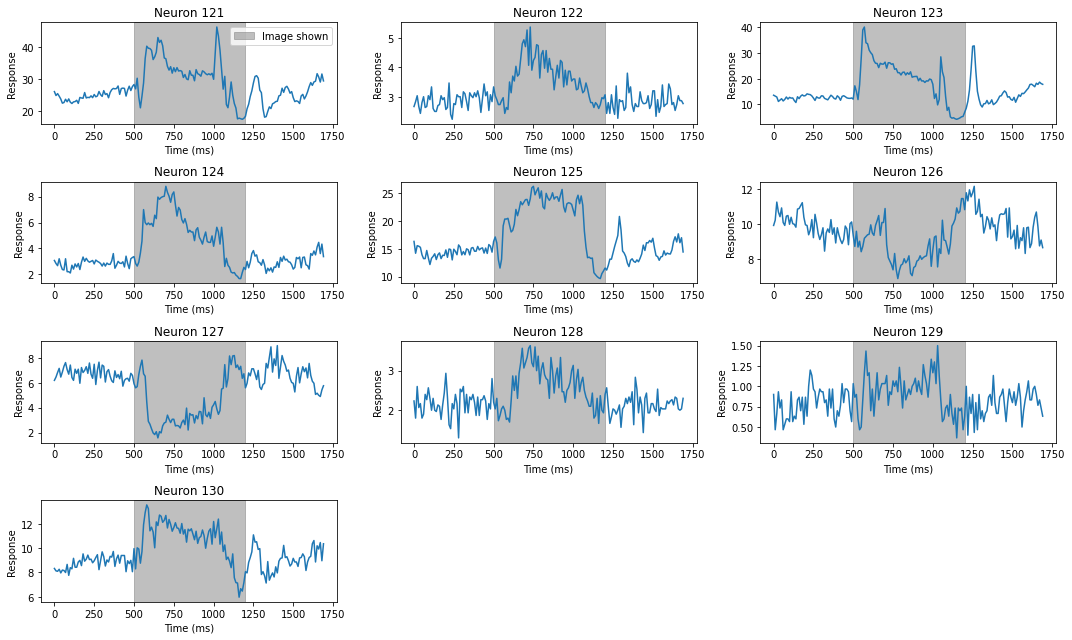

In [28]:
da.plot_avrg_response(data_path, True, n_neurons=10,m=12)

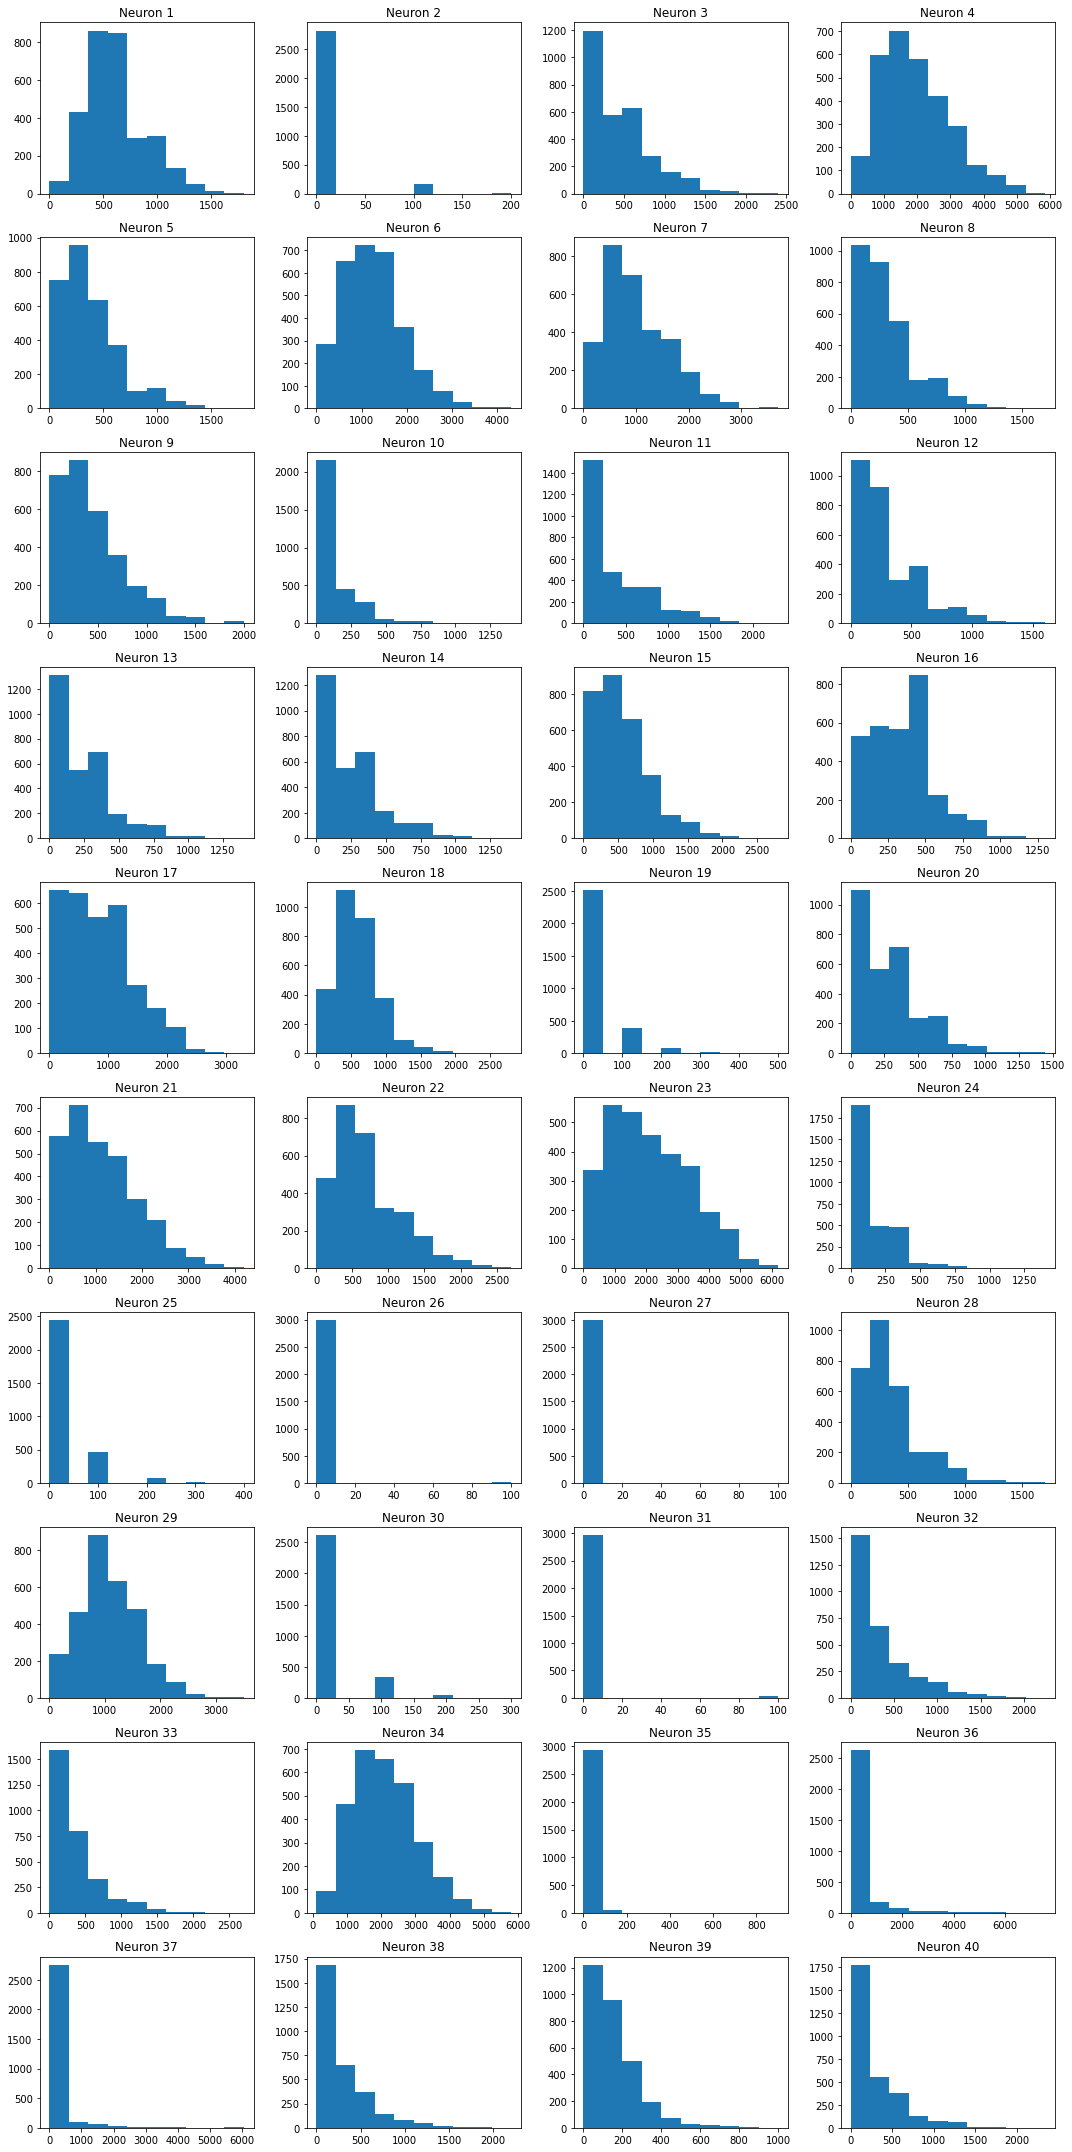

In [29]:
da.neural_histogram(responses,50,120,10,40)

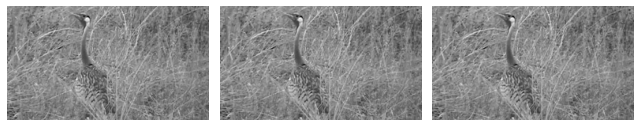

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,3, figsize=(9,16))
ax=ax.flatten()
for n in range(3):
    ax[n].imshow(np.transpose(images[167+n]),cmap='gray')
    ax[n].axis('off')
plt.tight_layout()
plt.show()


/project/subiculum/code/data_analysis.py:121: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  responses_tensor = torch.tensor(test_responses, device=device)


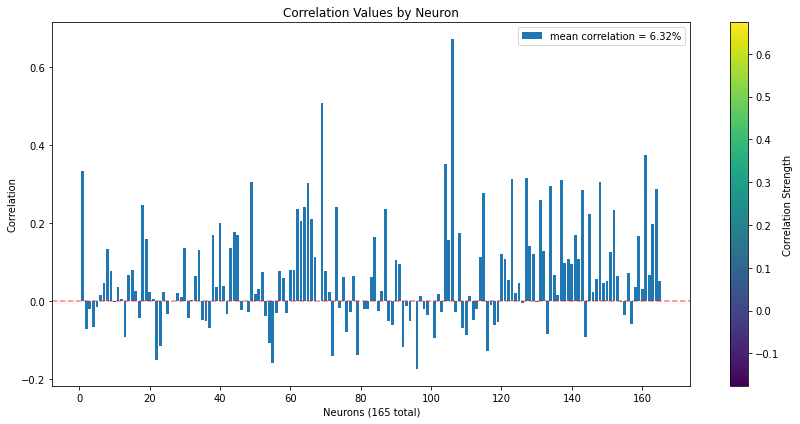

In [31]:
da.oracle_bar_plot(test_responses,test_images,device,)

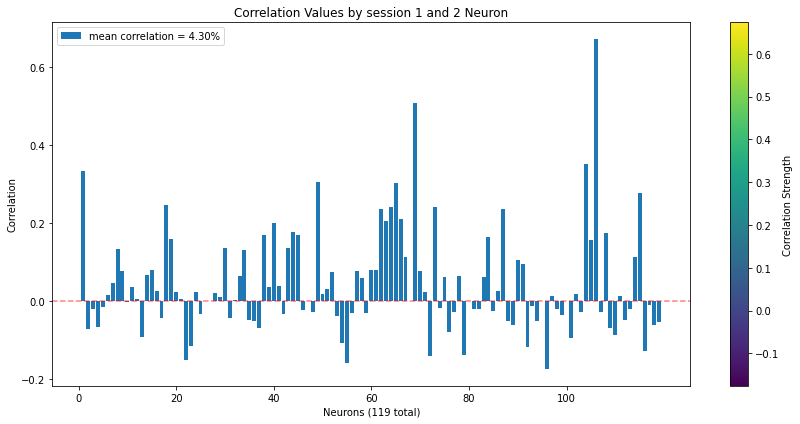

In [32]:
da.oracle_bar_plot(test_responses_sess,test_images,device," session 1 and 2 ")

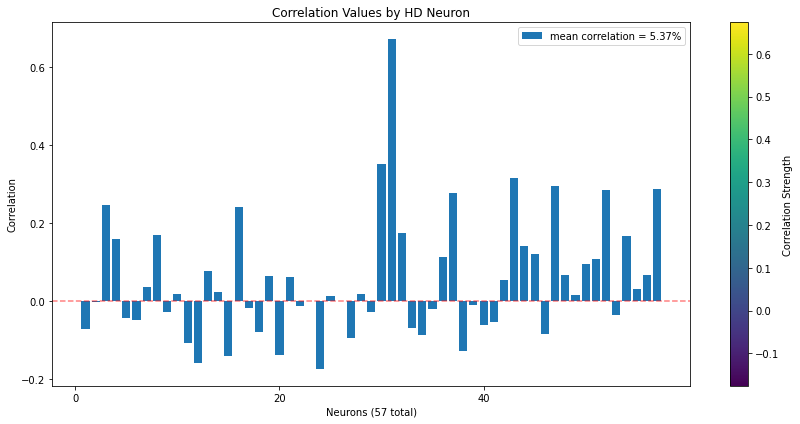

In [33]:
da.oracle_bar_plot(test_responses_HD_neurons, test_images, device, " HD ")

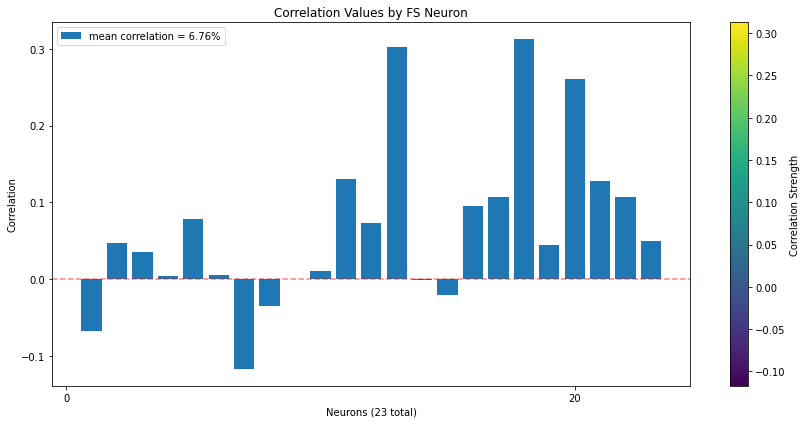

In [34]:
da.oracle_bar_plot(test_responses_FS_neurons,test_images,device, " FS ")

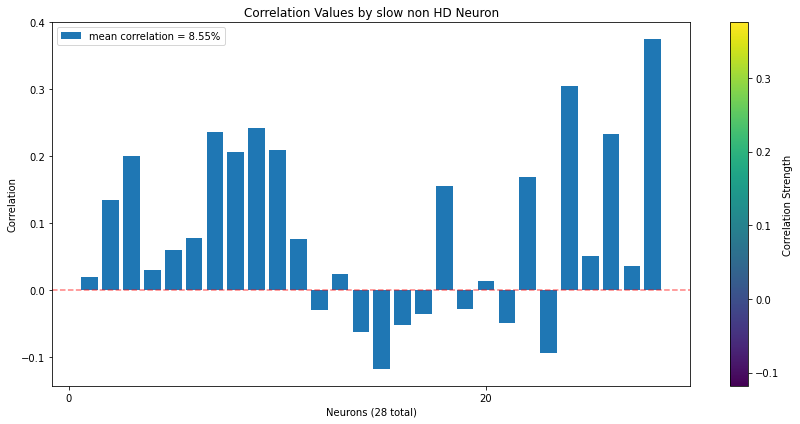

In [35]:
da.oracle_bar_plot(test_responses_slow_neurons,test_images,device, " slow non HD ")

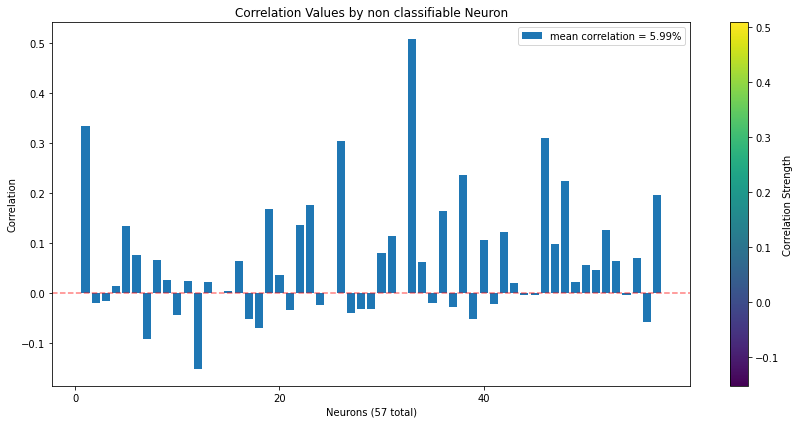

In [36]:
da.oracle_bar_plot(test_responses_NC_neurons,test_images,device, " non classifiable ")

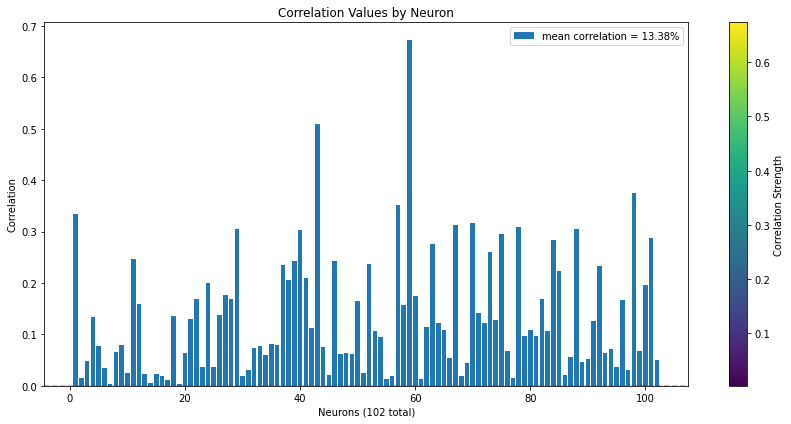

In [37]:
da.oracle_bar_plot(test_responses_good_neurons,test_images,device)

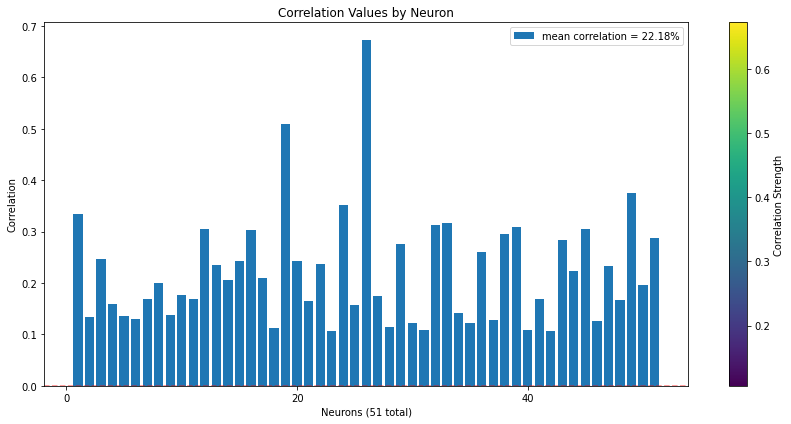

In [38]:
da.oracle_bar_plot(test_responses_very_good_neurons,test_images,device)

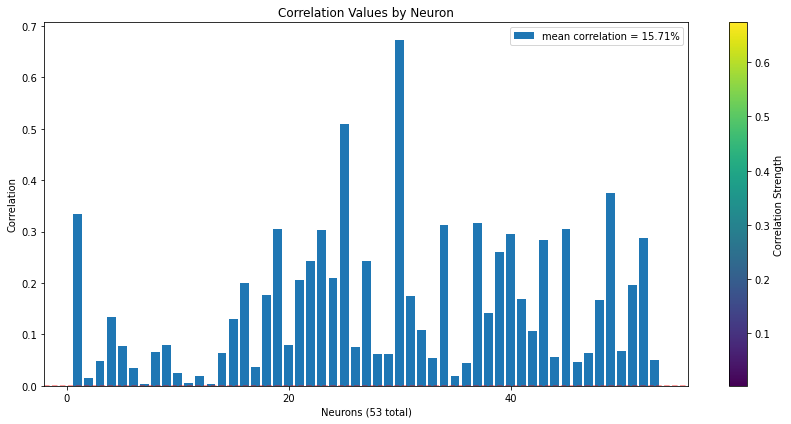

In [39]:
on_responses=responses_processed[:,(on_response_bool*(pred_array>0))!=0]
test_responses_on_response=on_responses[stim_bool==1]
test_responses_on_response.shape
da.oracle_bar_plot(test_responses_on_response,test_images,device)
on_responses_array=responses[(on_response_bool*(pred_array>0))!=0]
t_loader_or,v_loader_or,te_loader_or=nlb.dataloader_with_repeats(on_responses_array,images,stim_list,64)

(165, 3000, 170)
(3000, 170, 165)
(170, 165)


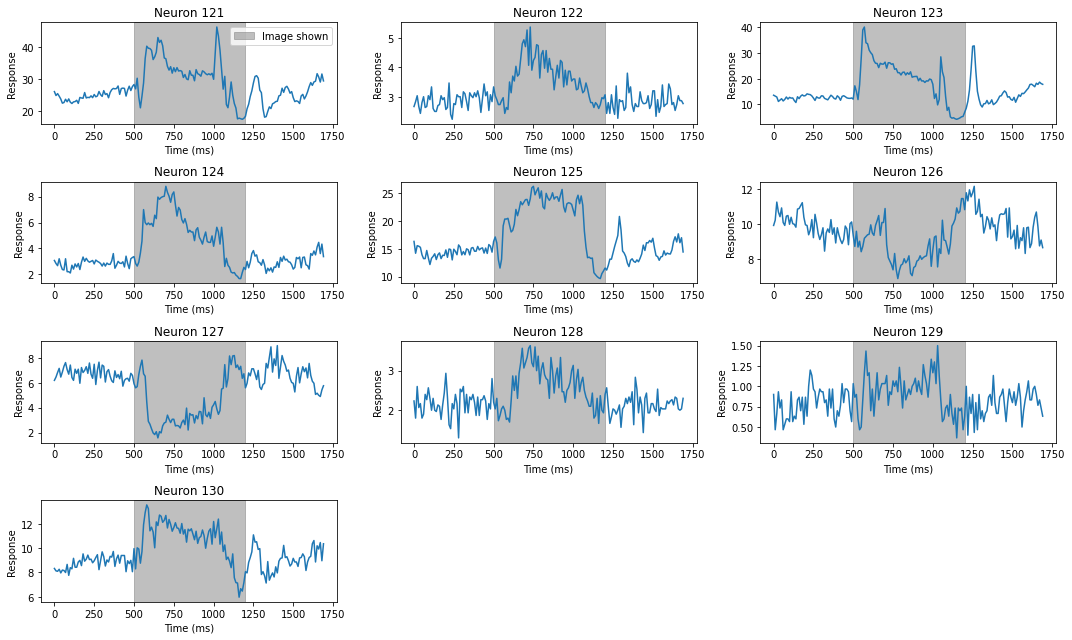

In [40]:
da.plot_avrg_response(data_path, True, n_neurons=10,m=12)

## Training

In [60]:
pred_array=da.oracle_prediction(test_responses,test_images,device).detach().cpu().numpy()
good_tensor=torch.zeros(165)
good_tensor[pred_array>0]=1
very_good_tensor=torch.zeros(165)
very_good_tensor[pred_array>0.1]=1
# responses_good=responses[pred_array>0]
# responses_very_good=responses[pred_array>0.1]

In [61]:
responses.shape

(165, 3000, 170)

In [62]:
model_all=nlb.DepthSepConvModel(1,5,7,16,165,reg_weight=0.5,image_width=128,image_height=72).to(device)
model_HD=nlb.DepthSepConvModel(1,5,7,16,57,gaussian_readout=False,reg_weight=0.5,image_width=128,image_height=72).to(device)
model_FS=nlb.DepthSepConvModel(1,5,7,16,23,gaussian_readout=False,reg_weight=0.5,image_width=128,image_height=72).to(device)
model_good=nlb.DepthSepConvModel(1,5,7,16,102,gaussian_readout=False,reg_weight=0.5,image_width=128,image_height=72).to(device)
model_slow=nlb.DepthSepConvModel(1,5,7,16,28,gaussian_readout=False,reg_weight=0.5,image_width=128,image_height=72).to(device)
model_very_good=nlb.DepthSepConvModel(1,11,11,16,51,gaussian_readout=False,reg_weight=10,image_width=128,image_height=72).to(device)
model_very_good_gauss=nlb.ConvModel(1,11,11,16,51).to(device)

train_loader, val_loader, test_loader=nlb.dataloader_with_repeats(responses,images,stim_list,64)
train_loader_HD, val_loader_HD, test_loader_HD=nlb.dataloader_with_repeats(responses,images,stim_list,64,cell_type=2,idx=idx_cellType)
train_loader_FS, val_loader_FS, test_loader_FS=nlb.dataloader_with_repeats(responses,images,stim_list,64,cell_type=1,idx=idx_cellType)
train_loader_good, val_loader_good, test_loader_good=nlb.dataloader_with_repeats(responses,images,stim_list,64,cell_type=1,idx=good_tensor)
train_loader_very_good, val_loader_very_good, test_loader_very_good=nlb.dataloader_with_repeats(responses,images,stim_list,64,cell_type=1, idx=very_good_tensor)
train_loader_slow, val_loader_slow, test_loader_slow=nlb.dataloader_with_repeats(responses,images,stim_list,64,cell_type=3,idx=idx_cellType)

In [63]:
for x,y in train_loader:
    print (y[0].shape)
    break

torch.Size([165])


In [64]:
tl.training_and_eval_with_lr(model_all,50,train_loader,val_loader,test_loader,device,lr=1e-3)

Epoch [1/50], validation correlation: 0.0207, trainloss: 0.8030
Epoch [2/50], validation correlation: 0.0242, trainloss: 0.7532
Epoch [3/50], validation correlation: -0.0132, trainloss: 0.7180
Epoch [4/50], validation correlation: -0.0163, trainloss: 0.6877
Epoch [5/50], validation correlation: -0.0151, trainloss: 0.6549
Epoch [6/50], validation correlation: -0.0115, trainloss: 0.6165
Epoch [7/50], validation correlation: -0.0094, trainloss: 0.5743
Early stopping triggered!

Test Loss: 0.5557
Test Correlation: 0.0079


In [46]:
tl.training_and_eval_with_lr(model_HD,50,train_loader_HD,val_loader_HD,test_loader_HD,device,lr=1e-5)

Epoch [1/50], validation correlation: -0.0045, trainloss: 1.9671
Epoch [2/50], validation correlation: -0.0063, trainloss: 1.3807
Epoch [3/50], validation correlation: -0.0073, trainloss: 1.0754
Epoch [4/50], validation correlation: -0.0086, trainloss: 0.9236
Epoch [5/50], validation correlation: -0.0064, trainloss: 0.8405
Epoch [6/50], validation correlation: -0.0061, trainloss: 0.7911
Early stopping triggered!

Test Loss: 0.7739
Test Correlation: -0.0248


In [47]:
tl.training_and_eval_with_lr(model_FS,50,train_loader_FS,val_loader_FS,test_loader_FS,device,lr=1e-5)

Epoch [1/50], validation correlation: -0.0135, trainloss: 0.9831
Epoch [2/50], validation correlation: -0.0128, trainloss: 0.8893
Epoch [3/50], validation correlation: -0.0109, trainloss: 0.8428
Epoch [4/50], validation correlation: -0.0081, trainloss: 0.8198
Epoch [5/50], validation correlation: -0.0092, trainloss: 0.8073
Epoch [6/50], validation correlation: -0.0122, trainloss: 0.7991
Epoch [7/50], validation correlation: -0.0167, trainloss: 0.7943
Epoch [8/50], validation correlation: -0.0051, trainloss: 0.7916
Epoch [9/50], validation correlation: -0.0104, trainloss: 0.7903
Epoch [10/50], validation correlation: -0.0098, trainloss: 0.7894
Epoch [11/50], validation correlation: 0.0123, trainloss: 0.7884
Epoch [12/50], validation correlation: 0.0140, trainloss: 0.7880
Epoch [13/50], validation correlation: 0.0000, trainloss: 0.7880
Epoch [14/50], validation correlation: -0.0149, trainloss: 0.7878
Epoch [15/50], validation correlation: -0.0319, trainloss: 0.7876
Epoch [16/50], validat

In [48]:
tl.training_and_eval_with_lr(model_good,50,train_loader_good,val_loader_good,test_loader_good,device,lr=1e-5)

Epoch [1/50], validation correlation: -0.0152, trainloss: 4.6259
Epoch [2/50], validation correlation: -0.0184, trainloss: 2.7980
Epoch [3/50], validation correlation: -0.0191, trainloss: 1.8628
Epoch [4/50], validation correlation: -0.0177, trainloss: 1.4076
Epoch [5/50], validation correlation: -0.0182, trainloss: 1.1572
Epoch [6/50], validation correlation: -0.0179, trainloss: 0.9959
Early stopping triggered!

Test Loss: 0.9370
Test Correlation: -0.0059


In [49]:
tl.training_and_eval_with_lr(model_slow,50,train_loader_slow,val_loader_slow,test_loader_slow,device,lr=1e-5)

Epoch [1/50], validation correlation: -0.0325, trainloss: 1.0662
Epoch [2/50], validation correlation: -0.0219, trainloss: 0.9257
Epoch [3/50], validation correlation: -0.0136, trainloss: 0.8539
Epoch [4/50], validation correlation: -0.0049, trainloss: 0.8184
Epoch [5/50], validation correlation: -0.0182, trainloss: 0.7981
Epoch [6/50], validation correlation: -0.0293, trainloss: 0.7846
Epoch [7/50], validation correlation: -0.0106, trainloss: 0.7760
Epoch [8/50], validation correlation: -0.0279, trainloss: 0.7706
Epoch [9/50], validation correlation: 0.0018, trainloss: 0.7673
Epoch [10/50], validation correlation: 0.0052, trainloss: 0.7656
Epoch [11/50], validation correlation: -0.0054, trainloss: 0.7644
Epoch [12/50], validation correlation: -0.0170, trainloss: 0.7641
Epoch [13/50], validation correlation: 0.0000, trainloss: 0.7635
Epoch [14/50], validation correlation: -0.0130, trainloss: 0.7635
Epoch [15/50], validation correlation: -0.0014, trainloss: 0.7632
Early stopping trigger

In [50]:
tl.training_and_eval_with_lr(model_very_good,50,train_loader_very_good,val_loader_very_good,test_loader_very_good,device,lr=1e-5)

Epoch [1/50], validation correlation: 0.0001, trainloss: 17.7319
Epoch [2/50], validation correlation: -0.0039, trainloss: 9.4720
Epoch [3/50], validation correlation: -0.0053, trainloss: 5.3341
Epoch [4/50], validation correlation: 0.0027, trainloss: 3.3297
Epoch [5/50], validation correlation: 0.0007, trainloss: 2.2495
Epoch [6/50], validation correlation: -0.0040, trainloss: 1.6111
Epoch [7/50], validation correlation: -0.0088, trainloss: 1.2411
Epoch [8/50], validation correlation: 0.0057, trainloss: 1.0282
Epoch [9/50], validation correlation: 0.0153, trainloss: 0.9145
Epoch [10/50], validation correlation: 0.0087, trainloss: 0.8508
Epoch [11/50], validation correlation: -0.0096, trainloss: 0.8216
Epoch [12/50], validation correlation: 0.0015, trainloss: 0.8032
Epoch [13/50], validation correlation: 0.0091, trainloss: 0.7926
Epoch [14/50], validation correlation: 0.0144, trainloss: 0.7874
Early stopping triggered!

Test Loss: 0.7853
Test Correlation: -0.0124


In [51]:
tl.training_and_eval_with_lr(model_very_good_gauss,100,train_loader_very_good,val_loader_very_good,test_loader_very_good,device,lr=1e-5, early_stopping=False)

Epoch [1/100], validation correlation: 0.0179, trainloss: 0.8470
Epoch [2/100], validation correlation: 0.0172, trainloss: 0.8463
Epoch [3/100], validation correlation: 0.0175, trainloss: 0.8454
Epoch [4/100], validation correlation: 0.0178, trainloss: 0.8442
Epoch [5/100], validation correlation: 0.0183, trainloss: 0.8429
Epoch [6/100], validation correlation: 0.0184, trainloss: 0.8414
Epoch [7/100], validation correlation: 0.0185, trainloss: 0.8412
Epoch [8/100], validation correlation: 0.0191, trainloss: 0.8409
Epoch [9/100], validation correlation: 0.0194, trainloss: 0.8401
Epoch [10/100], validation correlation: 0.0197, trainloss: 0.8389
Epoch [11/100], validation correlation: 0.0199, trainloss: 0.8383
Epoch [12/100], validation correlation: 0.0198, trainloss: 0.8374
Epoch [13/100], validation correlation: 0.0201, trainloss: 0.8364
Epoch [14/100], validation correlation: 0.0202, trainloss: 0.8361
Epoch [15/100], validation correlation: 0.0202, trainloss: 0.8359
Epoch [16/100], val

In [52]:
model_all_gauss=nlb.DepthSepConvModel(1,5,7,32,165).to(device)
model_HD_gauss=nlb.DepthSepConvModel(1,5,7,32,57).to(device)
model_FS_gauss=nlb.DepthSepConvModel(1,5,7,32,23).to(device)
model_good_gauss=nlb.DepthSepConvModel(1,5,7,32,102).to(device)
model_slow_gauss=nlb.DepthSepConvModel(1,5,7,32,28).to(device)
model_very_good_gauss=nlb.DepthSepConvModel(1,11,11,32,51).to(device)

In [53]:
tl.training_and_eval_with_lr(model_all_gauss,50,train_loader,val_loader,test_loader,device,lr=1e-3)

Epoch [1/50], validation correlation: 0.0247, trainloss: 0.7860
Epoch [2/50], validation correlation: -0.0102, trainloss: 0.7137
Epoch [3/50], validation correlation: -0.0102, trainloss: 0.6540
Epoch [4/50], validation correlation: -0.0101, trainloss: 0.5936
Epoch [5/50], validation correlation: -0.0080, trainloss: 0.5400
Epoch [6/50], validation correlation: -0.0066, trainloss: 0.5014
Early stopping triggered!

Test Loss: 0.4843
Test Correlation: -0.0136


In [54]:
tl.training_and_eval_with_lr(model_HD_gauss,50,train_loader_HD,val_loader_HD,test_loader_HD,device,lr=1e-5,gamma=0.5)

Epoch [1/50], validation correlation: 0.0186, trainloss: 0.8334
Epoch [2/50], validation correlation: 0.0177, trainloss: 0.8324
Epoch [3/50], validation correlation: 0.0180, trainloss: 0.8304
Epoch [4/50], validation correlation: 0.0177, trainloss: 0.8289
Epoch [5/50], validation correlation: 0.0177, trainloss: 0.8271
Epoch [6/50], validation correlation: 0.0177, trainloss: 0.8269
Early stopping triggered!

Test Loss: 0.8312
Test Correlation: 0.0139


In [55]:
tl.training_and_eval_with_lr(model_FS_gauss,50,train_loader_FS,val_loader_FS,test_loader_FS,device,lr=1e-5)

Epoch [1/50], validation correlation: 0.0146, trainloss: 0.8584
Epoch [2/50], validation correlation: 0.0138, trainloss: 0.8570
Epoch [3/50], validation correlation: 0.0129, trainloss: 0.8563
Epoch [4/50], validation correlation: 0.0144, trainloss: 0.8553
Epoch [5/50], validation correlation: 0.0123, trainloss: 0.8550
Epoch [6/50], validation correlation: 0.0123, trainloss: 0.8536
Early stopping triggered!

Test Loss: 0.8502
Test Correlation: 0.0592


In [56]:
tl.training_and_eval_with_lr(model_good_gauss,50,train_loader_good,val_loader_good,test_loader_good,device,lr=1e-5)

Epoch [1/50], validation correlation: 0.0229, trainloss: 0.8428
Epoch [2/50], validation correlation: 0.0215, trainloss: 0.8416
Epoch [3/50], validation correlation: 0.0219, trainloss: 0.8402
Epoch [4/50], validation correlation: 0.0202, trainloss: 0.8390
Epoch [5/50], validation correlation: 0.0211, trainloss: 0.8379
Epoch [6/50], validation correlation: 0.0198, trainloss: 0.8368
Early stopping triggered!

Test Loss: 0.8369
Test Correlation: 0.0336


In [57]:
tl.training_and_eval_with_lr(model_slow_gauss,50,train_loader_slow,val_loader_slow,test_loader_slow,device,lr=1e-5)

Epoch [1/50], validation correlation: -0.0000, trainloss: 0.8449
Epoch [2/50], validation correlation: -0.0014, trainloss: 0.8431
Epoch [3/50], validation correlation: -0.0017, trainloss: 0.8417
Epoch [4/50], validation correlation: -0.0018, trainloss: 0.8402
Epoch [5/50], validation correlation: -0.0018, trainloss: 0.8391
Epoch [6/50], validation correlation: -0.0023, trainloss: 0.8384
Early stopping triggered!

Test Loss: 0.8353
Test Correlation: 0.0025


In [58]:
tl.training_and_eval_with_lr(model_very_good_gauss,50,train_loader_very_good,val_loader_very_good,test_loader_very_good,device,lr=1e-5,Poisson=False)

Epoch [1/50], validation correlation: 0.0209, trainloss: 0.3981
Epoch [2/50], validation correlation: 0.0191, trainloss: 0.3960
Epoch [3/50], validation correlation: 0.0191, trainloss: 0.3945
Epoch [4/50], validation correlation: 0.0194, trainloss: 0.3921
Epoch [5/50], validation correlation: 0.0198, trainloss: 0.3904
Epoch [6/50], validation correlation: 0.0202, trainloss: 0.3880
Early stopping triggered!

Test Loss: 0.3810
Test Correlation: 0.0364


In [59]:
on_responses=responses_processed[:,(on_response_bool*(pred_array>0))!=0]
on_responses_array=responses[(on_response_bool*(pred_array>0))!=0]
t_loader_or,v_loader_or,te_loader_or=nlb.dataloader_with_repeats(on_responses_array,images,stim_list,64)
model_or_gauss=nlb.DepthSepConvModel(3,5,11,64,53).to(device)
tl.training_and_eval_with_lr(model_or_gauss,100,t_loader_or,te_loader_or,v_loader_or,device, Poisson=False, gamma=0, early_stopping=False)


Epoch [1/100], validation correlation: -0.0098, trainloss: 0.0779
Epoch [2/100], validation correlation: -0.0130, trainloss: 0.0303
Epoch [3/100], validation correlation: 0.0130, trainloss: 0.0264
Epoch [4/100], validation correlation: 0.0136, trainloss: 0.0241
Epoch [5/100], validation correlation: 0.0352, trainloss: 0.0236
Epoch [6/100], validation correlation: 0.0462, trainloss: 0.0233
Epoch [7/100], validation correlation: 0.0485, trainloss: 0.0232
Epoch [8/100], validation correlation: 0.0456, trainloss: 0.0232
Epoch [9/100], validation correlation: 0.0481, trainloss: 0.0231
Epoch [10/100], validation correlation: 0.0596, trainloss: 0.0230
Epoch [11/100], validation correlation: 0.0554, trainloss: 0.0231
Epoch [12/100], validation correlation: 0.0600, trainloss: 0.0230
Epoch [13/100], validation correlation: 0.0550, trainloss: 0.0229
Epoch [14/100], validation correlation: 0.0637, trainloss: 0.0229
Epoch [15/100], validation correlation: 0.0560, trainloss: 0.0230
Epoch [16/100], v